In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Foreset fire dataset   
#### Source:  
http://archive.ics.uci.edu/ml/datasets/Forest+Fires   
http://www3.dsi.uminho.pt/pcortez/forestfires/   

#### Data Set Information:    
Forest fire data from the Montesinhonatural park, from the Tras-os-Montes northeast region of Portugal. This park contains a high floraand fauna diversity. Inserted within a supra-Mediterranean climate, the average annualtemperature is within the range 8 to 12◦C. The data used in the experiments was collected from January 2000 to December 2003 and it was built using two sources. The first database was collected by the inspector that was responsible for the Montesinhofire  occurrences. At  a  daily  basis,  every time  a  forest fire  occurred, several features were registered, such as the time, date, spatial location within a 9×9 grid, the type of vegetation involved, the six components of the FWI systemand the total burned area. The second database was collectedby the Braganc ̧a Poly-technic Institute, containing several weather observations (e.g. wind speed) that were recorded  with  a  30  minute  period  by  a  meteorological stationlocated  in  the  center of the Montesinho park. The two databases were stored in tens of individual spread-sheets, under distinct formats, and a substantial manual effort was performed to integrate them into a single dataset with a total of 517 entries.   

#### Attribute Information:   
1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9  
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9  
3. month - month of the year: "jan" to "dec"   
4. day - day of the week: "mon" to "sun"  
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20   
6. DMC - DMC index from the FWI system: 1.1 to 291.3   
7. DC - DC index from the FWI system: 7.9 to 860.6   
8. ISI - ISI index from the FWI system: 0.0 to 56.10  
9. temp - temperature in Celsius degrees: 2.2 to 33.30  
10. RH - relative humidity in %: 15.0 to 100  
11. wind - wind speed in km/h: 0.40 to 9.40   
12. rain - outside rain in mm/m2 : 0.0 to 6.4   
13. area - the burned area of the forest (in ha): 0.00 to 1090.84   
(this output variable is very skewed towards 0.0, thus it may make  
sense to model with the logarithm transform).   

In [2]:
dataset_name = 'forestfire'

In [6]:
file_path = '~/data/forest-fires/'
file_name = 'forestfires.csv'
file = file_path + file_name
df = pd.read_csv(file)
df.shape

(517, 13)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
X        517 non-null int64
Y        517 non-null int64
month    517 non-null object
day      517 non-null object
FFMC     517 non-null float64
DMC      517 non-null float64
DC       517 non-null float64
ISI      517 non-null float64
temp     517 non-null float64
RH       517 non-null int64
wind     517 non-null float64
rain     517 non-null float64
area     517 non-null float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [58]:
# convert month to numeric value
df['month'] = pd.to_datetime(df['month'], format='%b').dt.month

In [59]:
# convert day to numeric value
# abbreviated days aren't recognized by datetime so needed to create a mapping
d = {'mon':1, 'tue':2, 'wed':3, 'thu':4, 'fri':5, 'sat':6, 'sun':7}
df['day'] = df['day'].map(d)

In [60]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [61]:
df.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,7.475822,4.259188,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,2.275990,2.072929,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,1.000000,1.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,7.000000,2.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,8.000000,5.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,9.000000,6.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,12.000000,7.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [62]:
# check dataframe for bad data
df.isnull().any() | df.isna().any()

X        False
Y        False
month    False
day      False
FFMC     False
DMC      False
DC       False
ISI      False
temp     False
RH       False
wind     False
rain     False
area     False
dtype: bool

In [63]:
(df.isnull() | df.isna()).sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [66]:
# get the feature names to make plotting easier
feature_names = list(df.columns.values)
feature_names.remove('area')

In [67]:
# add a burned_area label based on the area value (to make labeling plots easier)
df['burned_area'] = df['area'] > 0

Samples with burned area:       270
Samples without burned area:    247


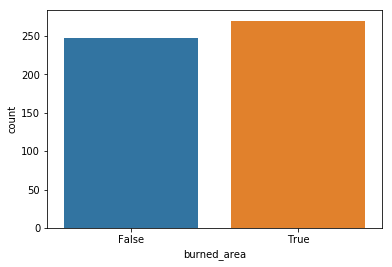

In [68]:
# get the number of samples for area > 0
num_burned_area = df[df['area'] > 0].shape[0]
num_non_burned_area = df[df['area'] == 0].shape[0]

print('Samples with burned area:      ', num_burned_area)
print('Samples without burned area:   ', num_non_burned_area)

sns.countplot(x='burned_area', data=df)
plt.savefig(dataset_name + '_countplot.png')
plt.show()

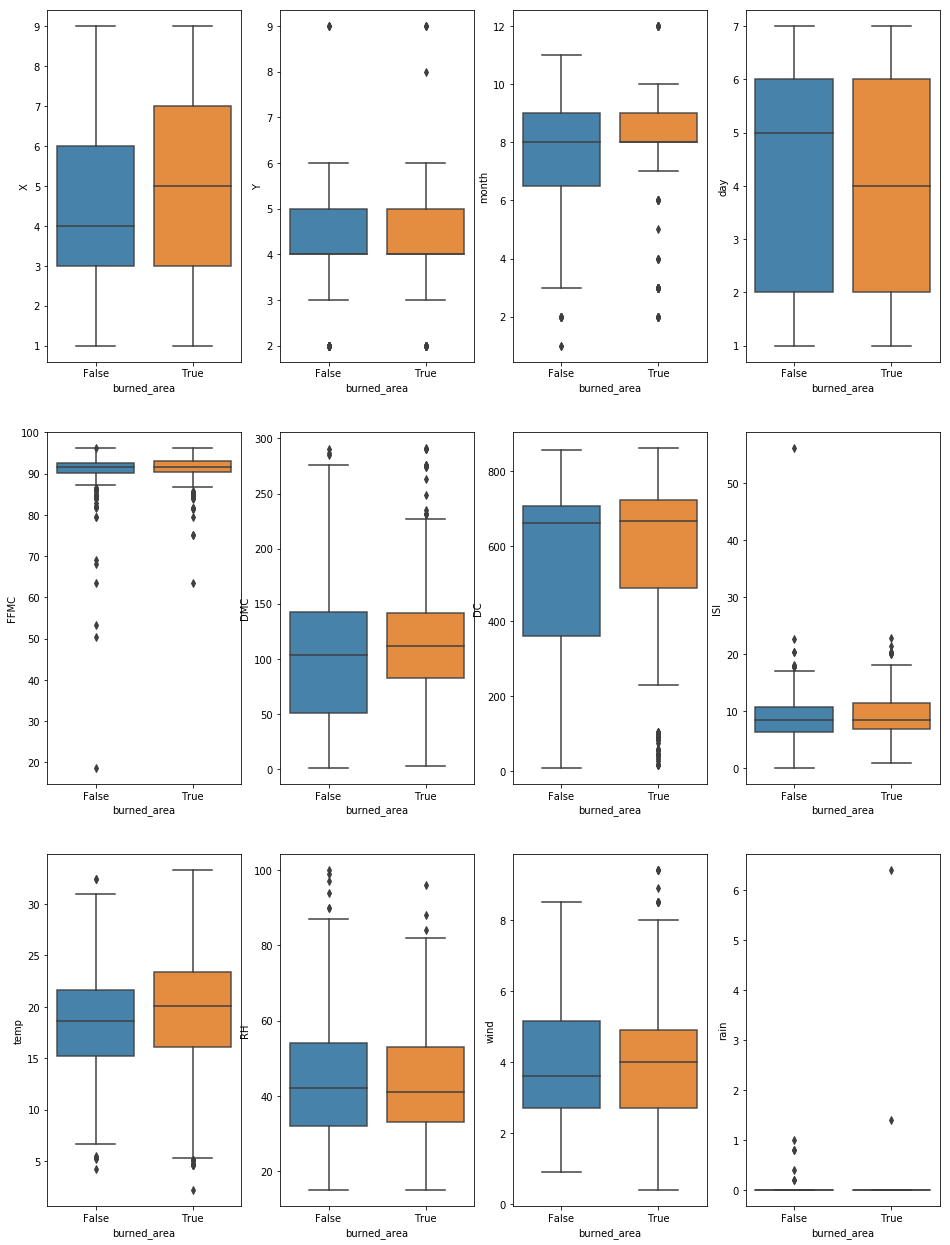

In [69]:
num_plots = len(feature_names)
num_columns = 4
num_rows = math.ceil(num_plots/num_columns) # round up
x_value = 'burned_area'

fig, axs = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(16,22))

if num_rows == 1:
    for index, name in enumerate(feature_names):
        sns.boxplot(x=x_value, y=name, data=df, ax=axs[index], boxprops=dict(alpha=.9))
else:
    for index, name in enumerate(feature_names):
        row = int(index / num_columns)
        col = index % num_columns
        sns.boxplot(x=x_value, y=name, data=df, ax=axs[row][col], boxprops=dict(alpha=.9))
plt.savefig(dataset_name + '_boxplots.png')  
plt.show()

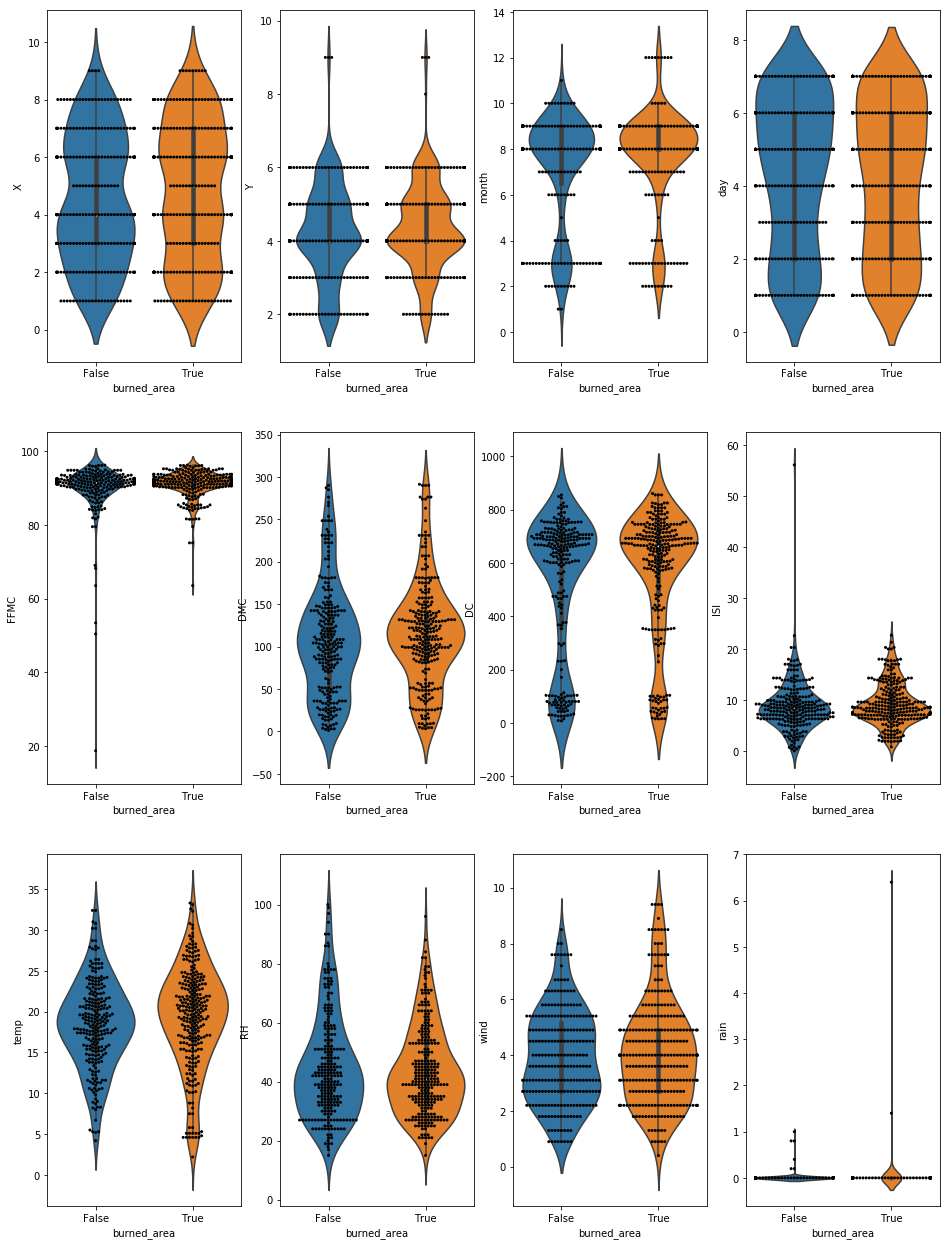

In [70]:
num_plots = len(feature_names)
num_columns = 4
num_rows = math.ceil(num_plots/num_columns) # round up
x_value = 'burned_area'

fig, axs = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(16,22))

if num_rows == 1:
    for index, name in enumerate(feature_names):
        sns.violinplot(x=x_value, y=name, data=df, ax=axs[index])
        sns.swarmplot(x=x_value, y=name, data=df, ax=axs[index], color='k', size=3);
else:
    for index, name in enumerate(feature_names):
        row = int(index / num_columns)
        col = index % num_columns
        sns.violinplot(x=x_value, y=name, data=df, ax=axs[row][col])
        sns.swarmplot(x=x_value, y=name, data=df, ax=axs[row][col], color='k', size=3);
plt.savefig(dataset_name + '_violinplots.png')  
plt.show()

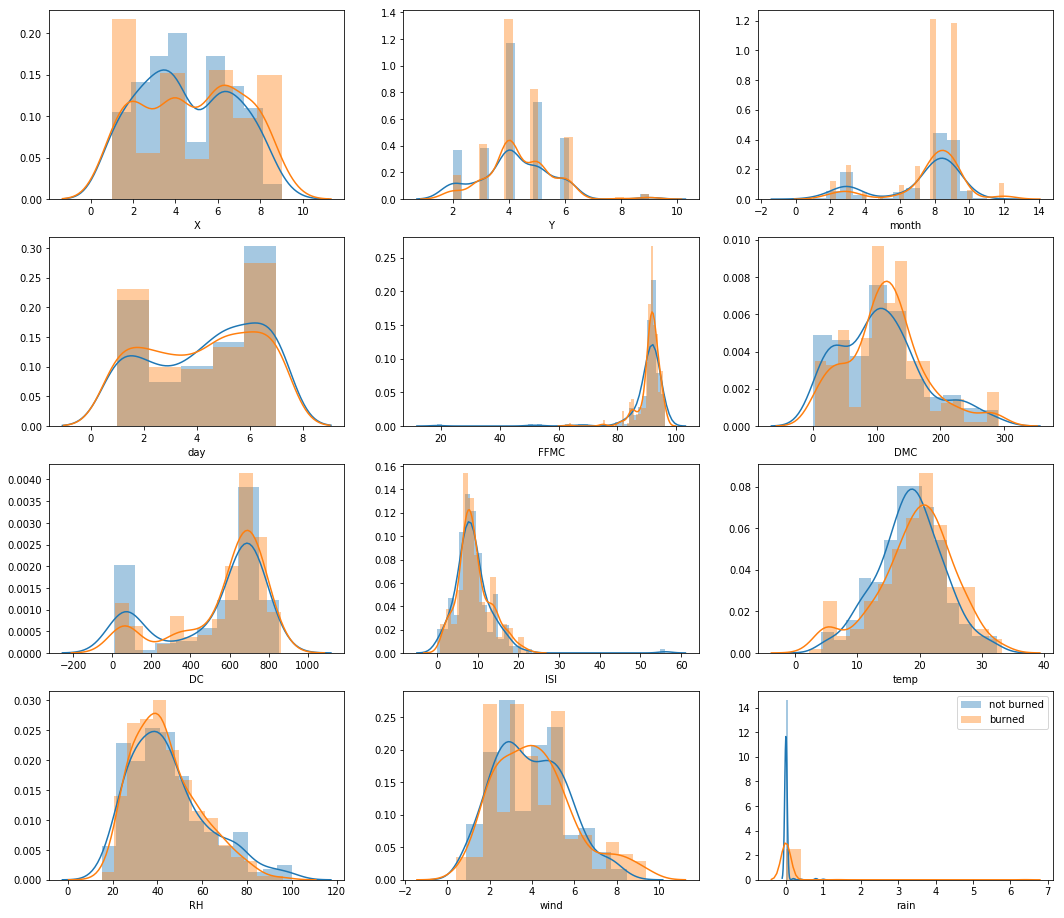

In [71]:
num_plots = len(feature_names)
num_columns = 3
num_rows = math.ceil(num_plots/num_columns) # round up
label = 'area'

fig, axs = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(18,16))

if num_rows == 1:
    for index, name in enumerate(feature_names):
        sns.distplot(df[df[label]==0][name], ax=axs[index])
        sns.distplot(df[df[label]>0][name], ax=axs[index])
else:
    for index, name in enumerate(feature_names):
        row = int(index / num_columns)
        col = index % num_columns
        sns.distplot(df[df[label]==0][name], ax=axs[row][col])
        sns.distplot(df[df[label]>0][name], ax=axs[row][col])
plt.legend(['not burned','burned'])
plt.savefig(dataset_name + '_distplots_by_burned_area.png')  
plt.show()

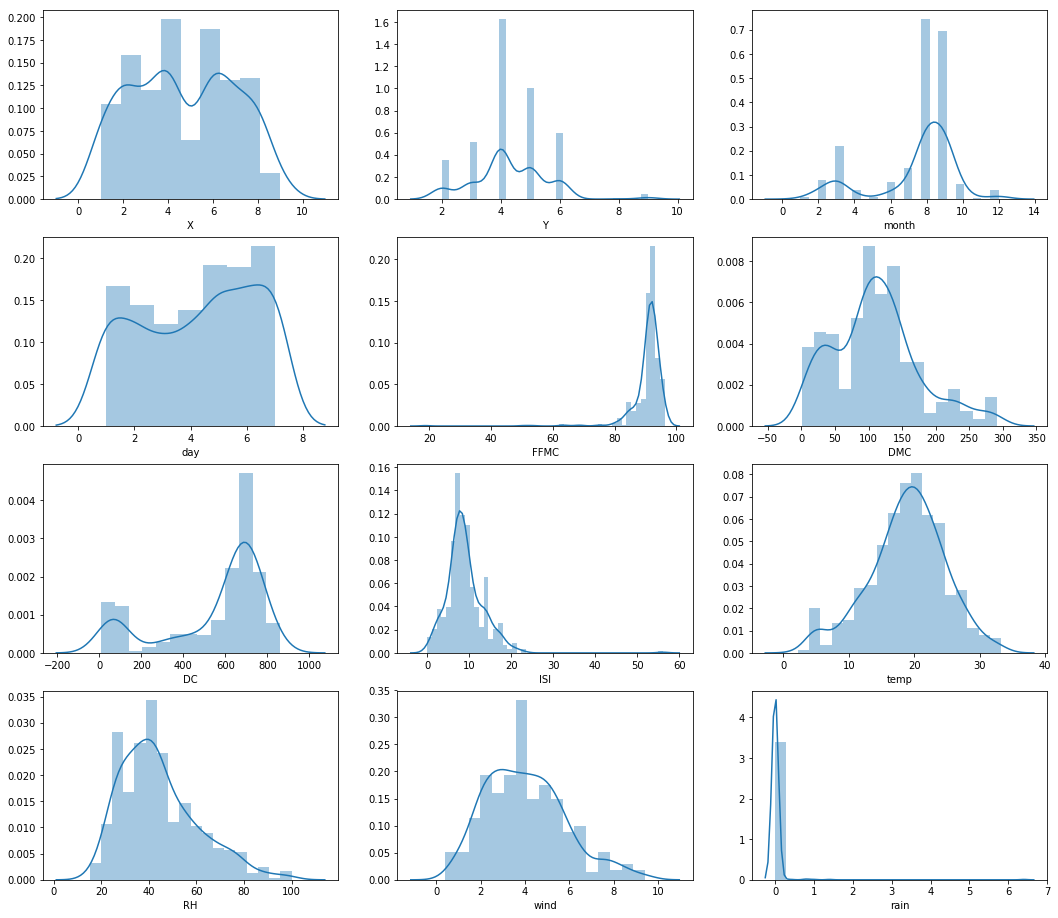

In [72]:
# distribution plot without factoring in burned area
num_plots = len(feature_names)
num_columns = 3
num_rows = int(num_plots/num_columns + num_plots%num_columns) # round up

fig, axs = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(18,16))

if num_rows == 1:
    for index, name in enumerate(feature_names):
        sns.distplot(df[name], ax=axs[index])
else:
    for index, name in enumerate(feature_names):
        row = int(index / num_columns)
        col = index % num_columns
        sns.distplot(df[name], ax=axs[row][col])
plt.savefig(dataset_name + '_distplots.png')  
plt.show()

In [73]:
# compute pairwise correlation of the attributes
corr = df.corr()
corr

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,burned_area
X,1.000000,0.539548,-0.065003,-0.024922,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.063385,0.062491
Y,0.539548,1.000000,-0.066292,-0.005453,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.044873,0.056892
month,-0.065003,-0.066292,1.000000,-0.050837,0.291477,0.466645,0.868698,0.186597,0.368842,-0.095280,-0.086368,0.013438,0.056496,0.130329
day,-0.024922,-0.005453,-0.050837,1.000000,-0.041068,0.062870,0.000105,0.032909,0.052190,0.092151,0.032478,-0.048340,0.023226,-0.042970
FFMC,-0.021039,-0.046308,0.291477,-0.041068,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122,0.073823
DMC,-0.048384,0.007782,0.466645,0.062870,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994,0.062672
DC,-0.085916,-0.101178,0.868698,0.000105,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383,0.096724
ISI,0.006210,-0.024488,0.186597,0.032909,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258,0.035663
temp,-0.051258,-0.024103,0.368842,0.052190,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844,0.076047
RH,0.085223,0.062221,-0.095280,0.092151,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519,-0.035587


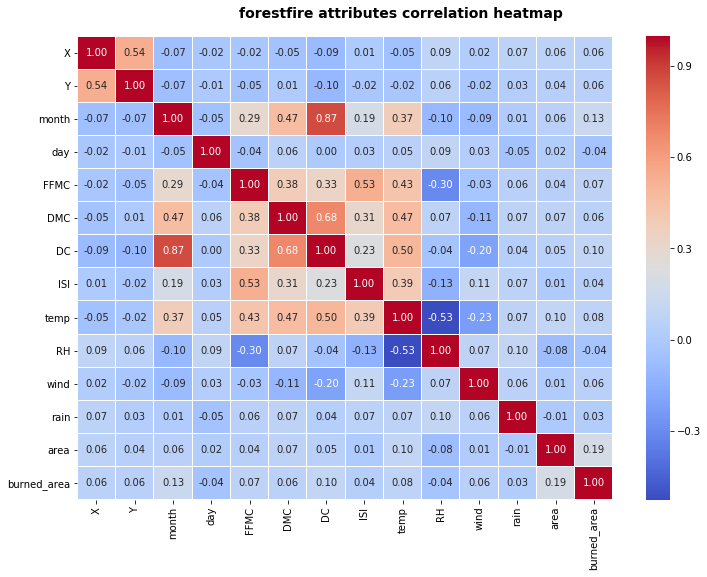

In [74]:
fig, (ax) = plt.subplots(1, 1, figsize=(12,8))

hm = sns.heatmap(corr, 
                 ax=ax,           # Axes in which to draw the plot, otherwise use the currently-active Axes.
                 cmap="coolwarm", # Color Map.
                 #square=True,    # If True, set the Axes aspect to “equal” so each cell will be square-shaped.
                 annot=True, 
                 fmt='.2f',       # String formatting code to use when adding annotations.
                 #annot_kws={"size": 14},
                 linewidths=.05)

fig.subplots_adjust(top=0.93)
fig.suptitle(dataset_name + ' attributes correlation heatmap', fontsize=14, fontweight='bold')
plt.savefig(dataset_name + '_heatmap.png')  
plt.show()

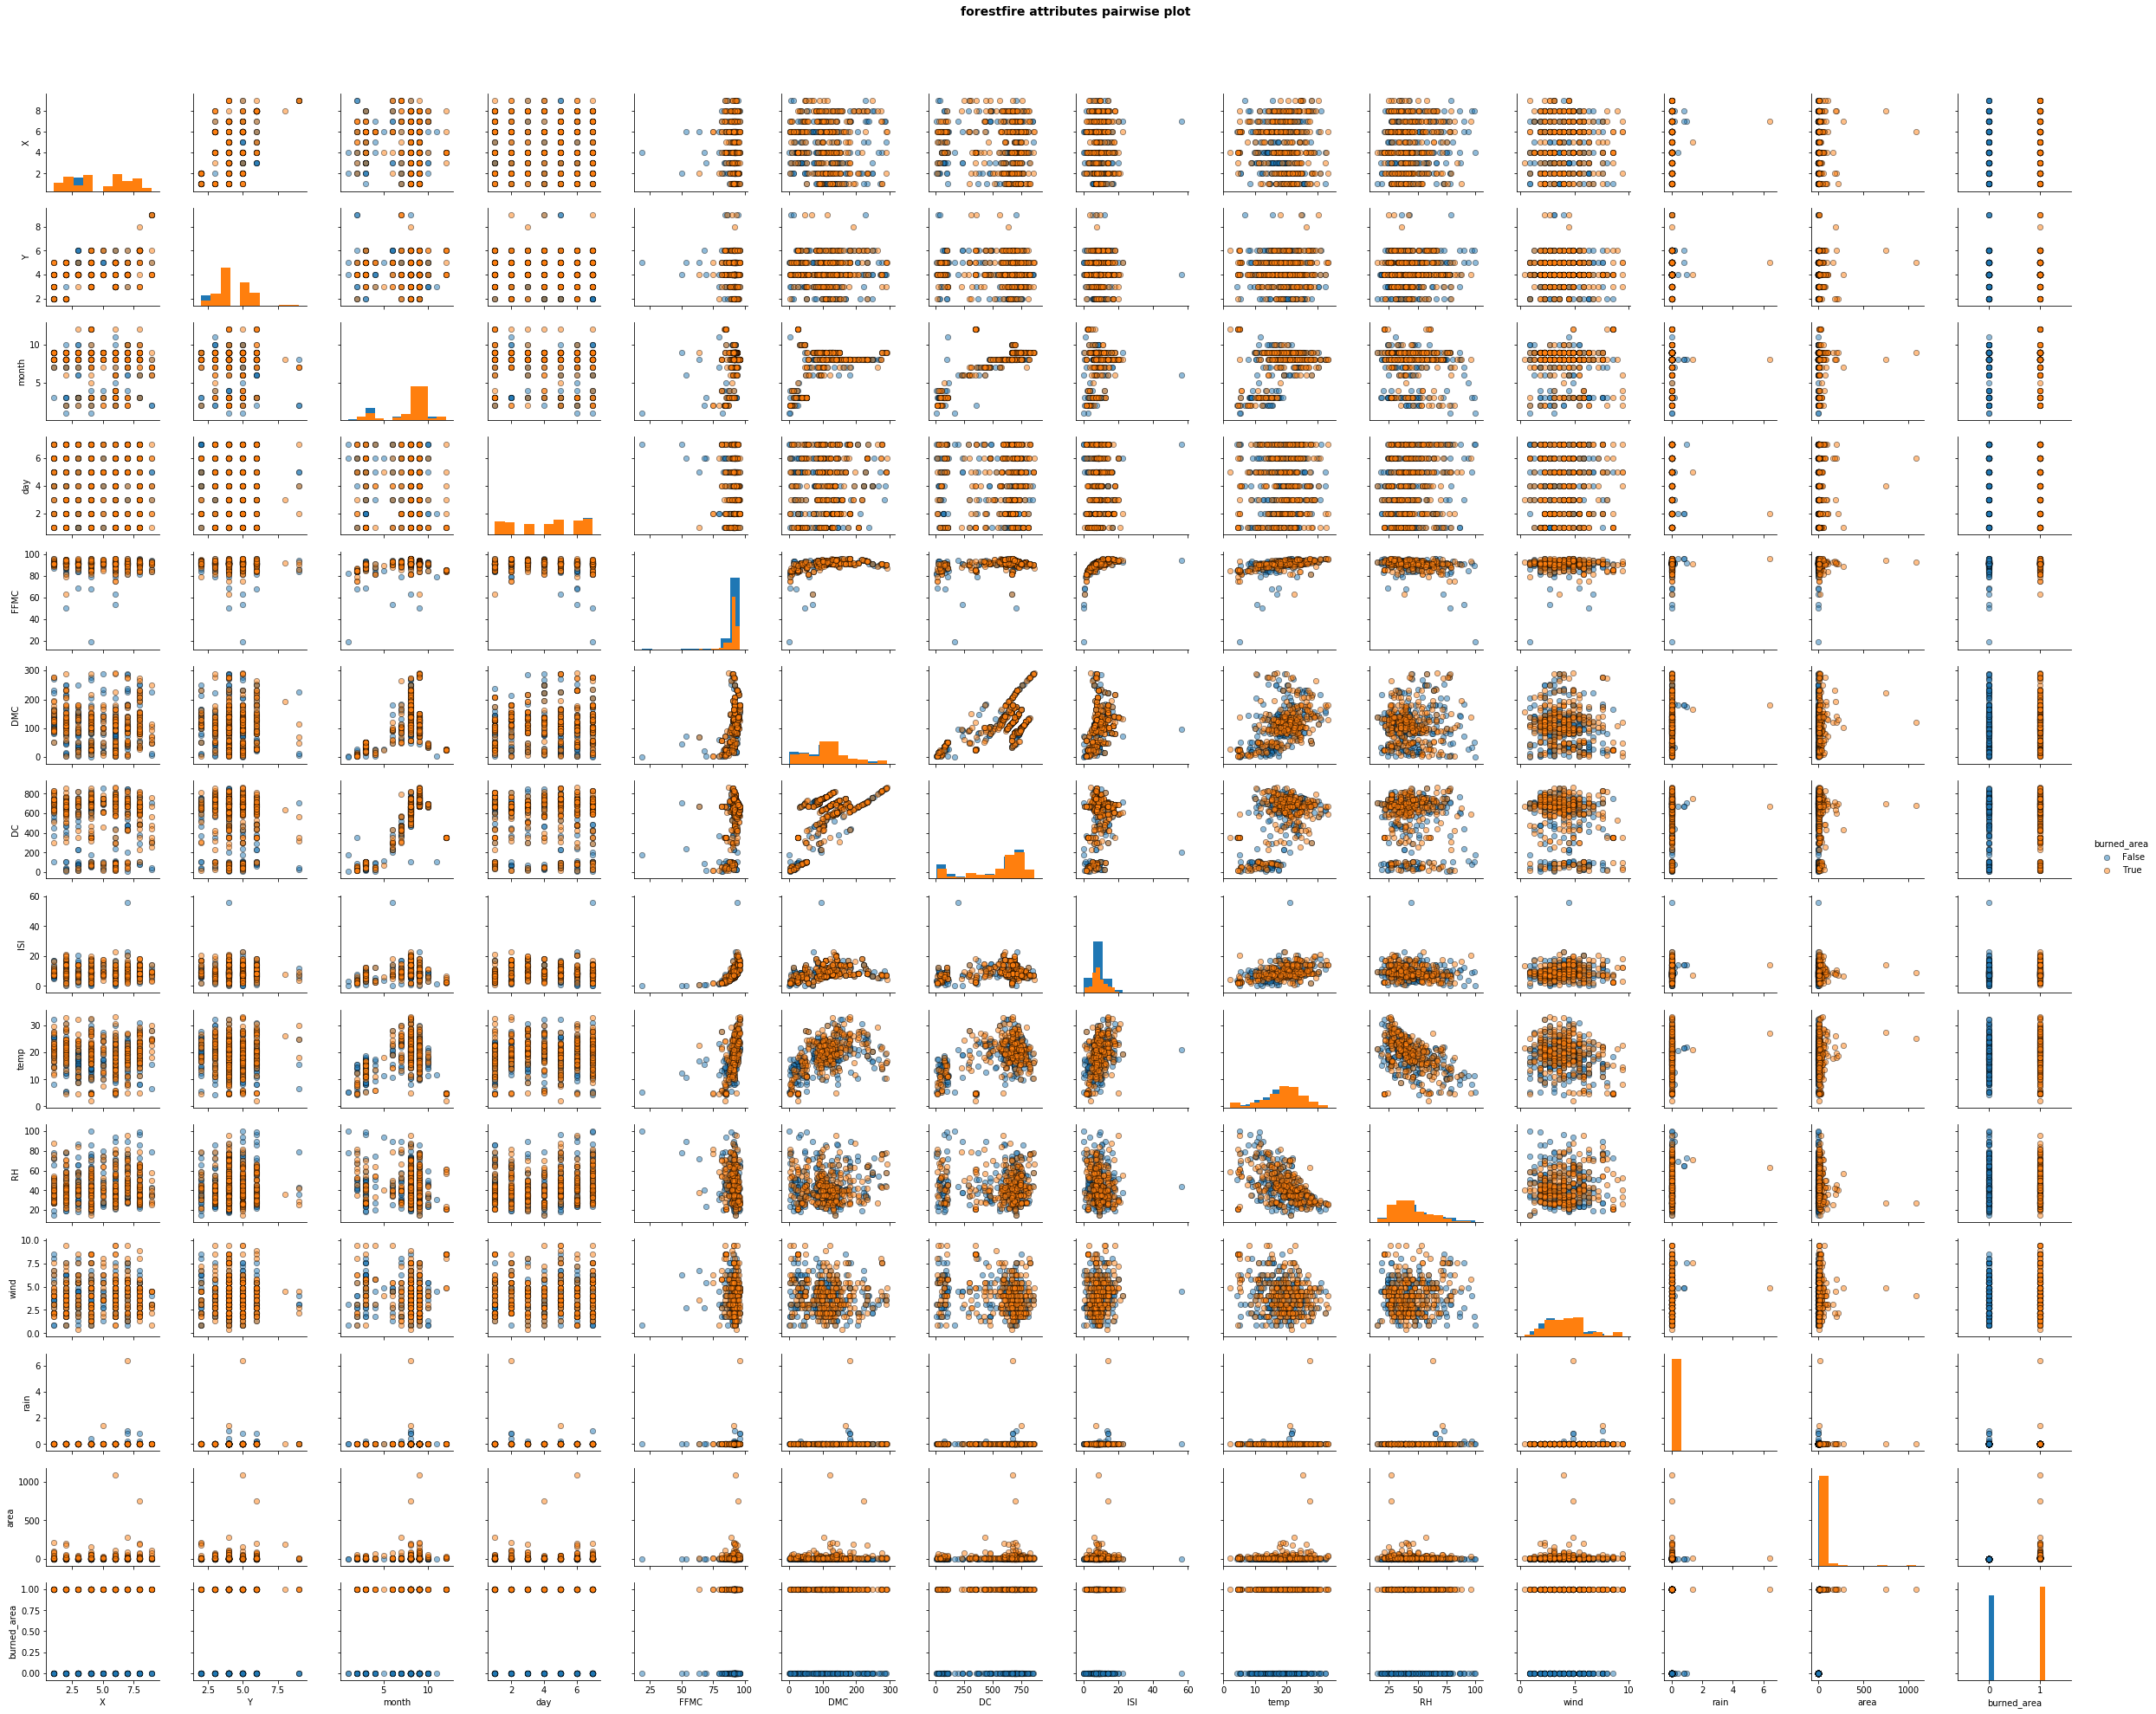

In [75]:
pp = sns.pairplot(df, height=2, aspect=1.2, hue='burned_area', diag_kind='hist',
                  plot_kws = {'alpha': 0.5, 's': 40, 'edgecolor': 'k'})

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
fig.suptitle(dataset_name + ' attributes pairwise plot', fontsize=14, fontweight='bold')
plt.savefig(dataset_name + '_pairplot_hist.png')  
plt.show()

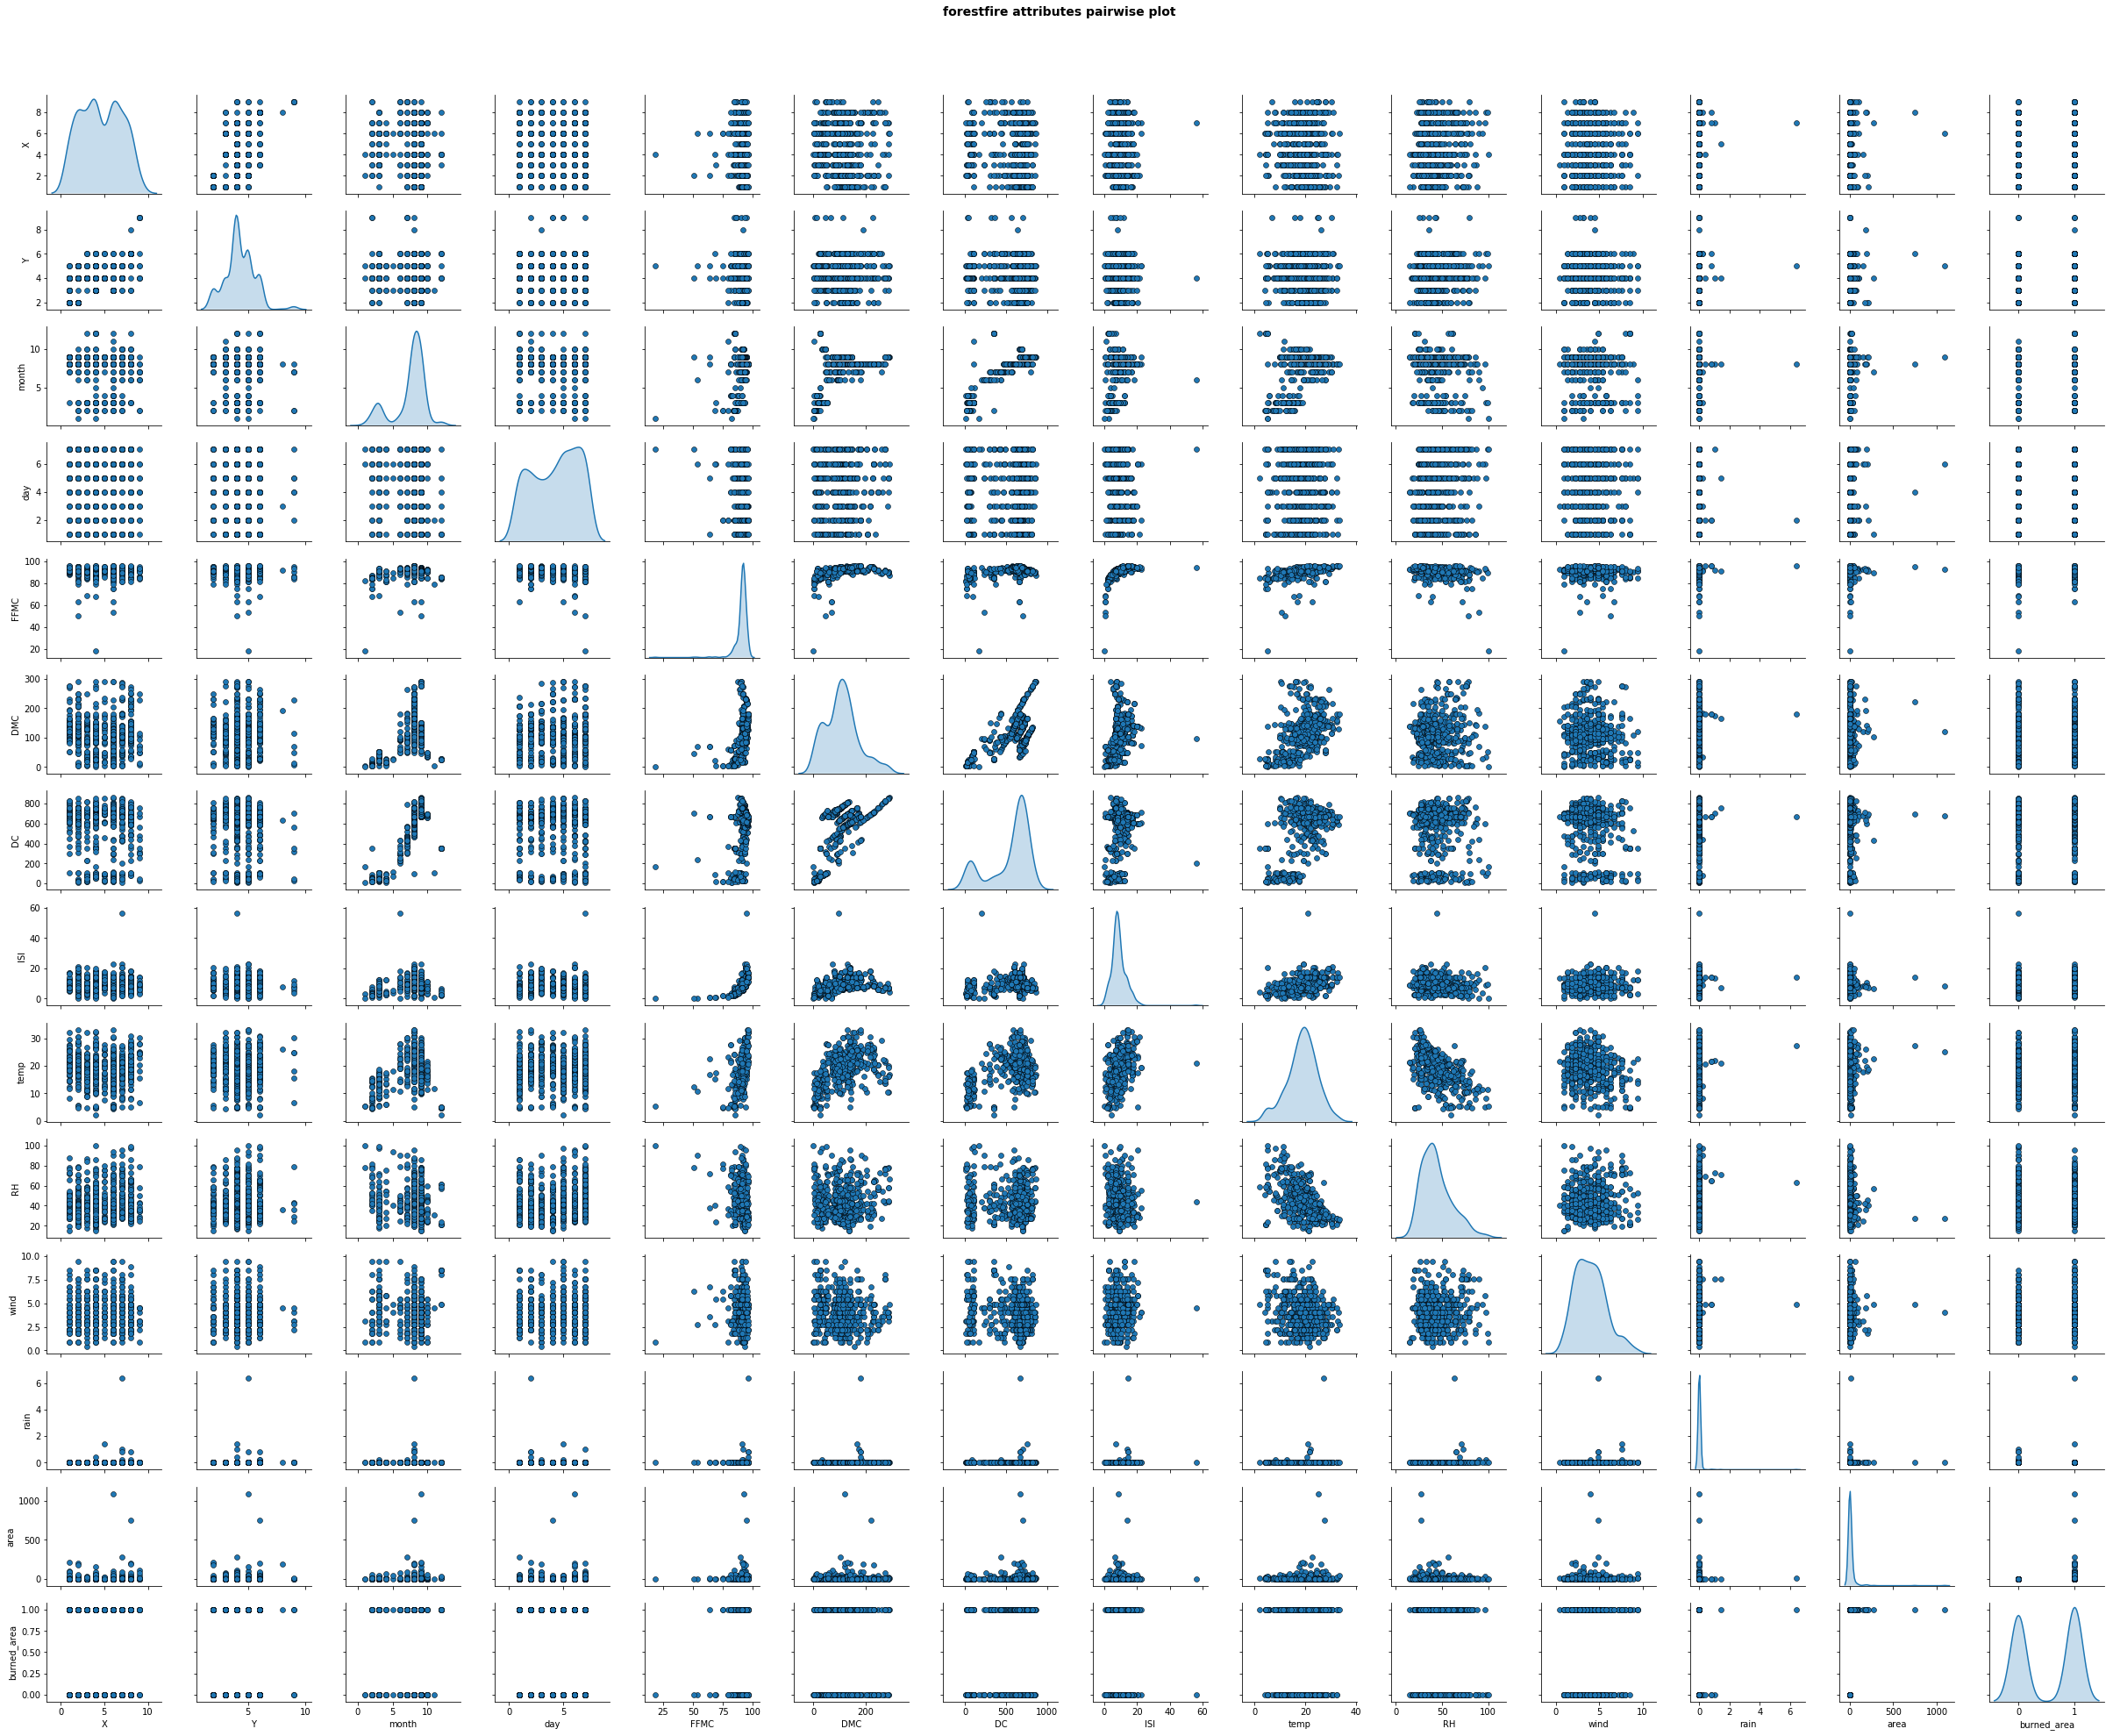

In [76]:
pp = sns.pairplot(df, height=2, aspect=1.2,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kws=dict(shade=True), # "diag" adjusts/tunes the diagonal plots
                  diag_kind="kde") # use "kde" for diagonal plots

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
fig.suptitle(dataset_name + ' attributes pairwise plot', fontsize=14, fontweight='bold')
plt.savefig(dataset_name + '_pairplot.png')  
plt.show()